### Analysis for key ASF regimes with new stratification


In [1]:
%matplotlib inline
#%config InlineBackend.figure_format='retina'

In [ ]:
from matplotlib import rc
rc('font', **{'size':30})
#rc('text', usetex=True)
rc('xtick', labelsize=30) #20 
rc('ytick', labelsize=30) #20
rc('axes', titlesize=30)    # fontsize of the axes title
rc('axes', labelsize=30) #24    # fontsize of the x and y labels

import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import os
import xarray as xr
import xgcm
from xgcm import Grid

In [3]:
nlayers = 4

In [4]:
from dask.distributed import Client

c=Client(local_directory = '/scratch/e14/qo9901/') 
c 

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.07/lib/python3.9/site-packages/distributed/node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40763 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/40763/status,
Dashboard: /proxy/40763/status,Workers: 4
Total threads: 4,Total memory: 100.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33233,Workers: 4
Dashboard: /proxy/40763/status,Total threads: 4
Started: Just now,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:36905,Total threads: 1
Dashboard: /proxy/46251/status,Memory: 25.00 GiB
Nanny: tcp://127.0.0.1:45895,


In [5]:
from matplotlib import ticker, cm

In [6]:
dsx_prog_mean = xr.open_mfdataset('/g/data/v45/qo9901/idealised-ASC/plotting-datasets/dsx_prog_setup_tmean_example_10years.nc/', combine = 'by_coords', decode_times=False, chunks={"Time": 10},engine='netcdf4', parallel=True)

In [7]:
import xgcm
grid = xr.open_mfdataset('/g/data/v45/qo9901/idealised-ASC/plotting-datasets/ocean_geometry.nc', combine='by_coords')
grid_new = grid.rename({'latq': 'yq','lonq': 'xq','lath': 'yh','lonh': 'xh'})
grid_new

<xarray.Dataset>
Dimensions:  (yh: 500, xh: 1000, yq: 500, xq: 1000)
Coordinates:
  * yh       (yh) float64 -249.5 -248.5 -247.5 -246.5 ... 247.5 248.5 249.5
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
  * yq       (yq) float64 -249.0 -248.0 -247.0 -246.0 ... 248.0 249.0 250.0
  * xq       (xq) float64 -499.0 -498.0 -497.0 -496.0 ... 498.0 499.0 500.0
Data variables: (12/19)
    geolatb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolonb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolat   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolon   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    D        (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    f        (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    ...       ...
    dyBu     (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Ah       (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Aq       (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dxCvo    (yq, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dyCuo    (yh, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    wet      (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
Attributes:
    filename:  ./ocean_geometry.nc

In [8]:
ds = xr.merge([dsx_prog_mean.u, dsx_prog_mean.v, grid_new])
ds

<xarray.Dataset>
Dimensions:  (xq: 1000, yh: 500, zl: 4, xh: 1000, yq: 500)
Coordinates:
  * xq       (xq) float64 -499.0 -498.0 -497.0 -496.0 ... 498.0 499.0 500.0
  * yh       (yh) float64 -249.5 -248.5 -247.5 -246.5 ... 247.5 248.5 249.5
  * zl       (zl) float64 1.028e+03 1.028e+03 1.028e+03 1.028e+03
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
  * yq       (yq) float64 -249.0 -248.0 -247.0 -246.0 ... 248.0 249.0 250.0
Data variables: (12/21)
    u        (zl, yh, xq) float32 dask.array<chunksize=(4, 500, 1000), meta=np.ndarray>
    v        (zl, yq, xh) float32 dask.array<chunksize=(4, 500, 1000), meta=np.ndarray>
    geolatb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolonb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolat   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolon   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    ...       ...
    dyBu     (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Ah       (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Aq       (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dxCvo    (yq, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dyCuo    (yh, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    wet      (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>

In [9]:
ds.coords['xq'].attrs.update(axis='X')
ds.coords['xh'].attrs.update(axis='X', c_grid_axis_shift=0.5)
ds.coords['yq'].attrs.update(axis='Y')
ds.coords['yh'].attrs.update(axis='Y', c_grid_axis_shift=0.5)

grid = xgcm.Grid(ds, periodic=['X'])
grid

<xgcm.Grid>
Z Axis (not periodic, boundary=None):
  * center   zl
X Axis (periodic, boundary=None):
  * center   xq --> right
  * right    xh --> center
Y Axis (not periodic, boundary=None):
  * center   yq --> right
  * right    yh --> center

In [10]:

dsx_prog_u_seltime = (grid.interp(dsx_prog_mean.u, axis = 'X'))
dsx_prog_v_seltime = (grid.interp(dsx_prog_mean.v, axis = 'Y', boundary = "extend"))
##speed


In [11]:
import cmocean

In [12]:
c_levels = np.arange(-3000,0,250)

In [13]:
import matplotlib as mpl

In [14]:
import dask
dask.config.set(**{'array.slicing.split_large_chunks': False})

In [98]:
import gc
c.run(gc.collect)

{'tcp://127.0.0.1:34559': 73,
 'tcp://127.0.0.1:36901': 73,
 'tcp://127.0.0.1:40315': 73,
 'tcp://127.0.0.1:43595': 73}

See y axis issue: https://github.com/matplotlib/matplotlib/issues/21369

In [16]:
##import wind stress
WindList =  '/g/data/v45/qo9901/idealised-ASC/plotting-datasets/windstress_input.nc'

windstress = xr.open_mfdataset(WindList,combine='by_coords', chunks={"Time": 10}, decode_times=False, engine='netcdf4', parallel=True)
windstress_xr = windstress.mean(dim ='x').load()
windstress_xr

<xarray.Dataset>
Dimensions:   (y: 500)
Coordinates:
  * y         (y) float64 -250.0 -249.0 -248.0 -247.0 ... 247.0 248.0 249.0
Data variables:
    STRESS_X  (y) float64 0.0 -3.948e-06 -1.579e-05 ... -1.579e-05 -3.948e-06
    STRESS_Y  (y) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0

In [77]:
dsx_prog_snapshot= xr.open_mfdataset('/home/561/qo9901/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/archive/output051/prog_daily.nc', combine = 'by_coords', decode_times=False, chunks={"Time": 10},engine='netcdf4', parallel=True)

In [78]:
dsx_prog_snapshot

<xarray.Dataset>
Dimensions:     (xq: 1000, yh: 500, zl: 4, Time: 365, nv: 2, xh: 1000, yq: 500,
                 zi: 5)
Coordinates:
  * xq          (xq) float64 -499.0 -498.0 -497.0 -496.0 ... 498.0 499.0 500.0
  * yh          (yh) float64 -249.5 -248.5 -247.5 -246.5 ... 247.5 248.5 249.5
  * zl          (zl) float64 1.028e+03 1.028e+03 1.028e+03 1.028e+03
  * Time        (Time) float64 1.862e+04 1.862e+04 ... 1.898e+04 1.898e+04
  * nv          (nv) float64 1.0 2.0
  * xh          (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
  * yq          (yq) float64 -249.0 -248.0 -247.0 -246.0 ... 248.0 249.0 250.0
  * zi          (zi) float64 1.028e+03 1.028e+03 1.028e+03 1.028e+03 1.028e+03
Data variables:
    u           (Time, zl, yh, xq) float32 dask.array<chunksize=(10, 4, 500, 1000), meta=np.ndarray>
    v           (Time, zl, yq, xh) float32 dask.array<chunksize=(10, 4, 500, 1000), meta=np.ndarray>
    h           (Time, zl, yh, xh) float32 dask.array<chunksize=(10, 4, 500, 1000), meta=np.ndarray>
    e           (Time, zi, yh, xh) float32 dask.array<chunksize=(10, 5, 500, 1000), meta=np.ndarray>
    uh          (Time, zl, yh, xq) float32 dask.array<chunksize=(10, 4, 500, 1000), meta=np.ndarray>
    vh          (Time, zl, yq, xh) float32 dask.array<chunksize=(10, 4, 500, 1000), meta=np.ndarray>
    average_T1  (Time) float64 dask.array<chunksize=(10,), meta=np.ndarray>
    average_T2  (Time) float64 dask.array<chunksize=(10,), meta=np.ndarray>
    average_DT  (Time) float64 dask.array<chunksize=(10,), meta=np.ndarray>
    Time_bnds   (Time, nv) float64 dask.array<chunksize=(10, 2), meta=np.ndarray>
Attributes:
    NumFilesInSet:  1
    title:          Navid Channel
    grid_type:      regular
    grid_tile:      N/A

In [110]:
import gc
c.run(gc.collect)

{'tcp://127.0.0.1:36413': 52,
 'tcp://127.0.0.1:36757': 73,
 'tcp://127.0.0.1:37921': 52,
 'tcp://127.0.0.1:41059': 52}

In [63]:
import xgcm
grid = xr.open_mfdataset('/home/561/qo9901/4layer_fresh_tau1p0e-01_newtopo_canyonSILLSTEEP_nDSW_sig1p0e+02/archive/output*/ocean_geometry.nc', combine='by_coords')
grid_new = grid.rename({'latq': 'yq','lonq': 'xq','lath': 'yh','lonh': 'xh'})
grid_new

<xarray.Dataset>
Dimensions:  (yh: 500, xh: 1000, yq: 500, xq: 1000)
Coordinates:
  * yh       (yh) float64 -249.5 -248.5 -247.5 -246.5 ... 247.5 248.5 249.5
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
  * yq       (yq) float64 -249.0 -248.0 -247.0 -246.0 ... 248.0 249.0 250.0
  * xq       (xq) float64 -499.0 -498.0 -497.0 -496.0 ... 498.0 499.0 500.0
Data variables: (12/19)
    geolatb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolonb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolat   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolon   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    D        (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    f        (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    ...       ...
    dyBu     (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Ah       (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Aq       (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dxCvo    (yq, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dyCuo    (yh, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    wet      (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
Attributes:
    filename:  ./ocean_geometry.nc

In [83]:
ds = xr.merge([dsx_prog_snapshot.uh, dsx_prog_snapshot.vh, grid_new])
ds

<xarray.Dataset>
Dimensions:  (xq: 1000, yh: 500, zl: 4, Time: 365, xh: 1000, yq: 500)
Coordinates:
  * xq       (xq) float64 -499.0 -498.0 -497.0 -496.0 ... 498.0 499.0 500.0
  * yh       (yh) float64 -249.5 -248.5 -247.5 -246.5 ... 247.5 248.5 249.5
  * zl       (zl) float64 1.028e+03 1.028e+03 1.028e+03 1.028e+03
  * Time     (Time) float64 1.862e+04 1.862e+04 ... 1.898e+04 1.898e+04
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
  * yq       (yq) float64 -249.0 -248.0 -247.0 -246.0 ... 248.0 249.0 250.0
Data variables: (12/21)
    uh       (Time, zl, yh, xq) float32 dask.array<chunksize=(10, 4, 500, 1000), meta=np.ndarray>
    vh       (Time, zl, yq, xh) float32 dask.array<chunksize=(10, 4, 500, 1000), meta=np.ndarray>
    geolatb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolonb  (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolat   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    geolon   (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    ...       ...
    dyBu     (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Ah       (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    Aq       (yq, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dxCvo    (yq, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    dyCuo    (yh, xq) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
    wet      (yh, xh) float64 dask.array<chunksize=(500, 1000), meta=np.ndarray>
Attributes:
    units:          m3 s-1
    long_name:      Zonal Thickness Flux
    cell_methods:   zl:sum yh:sum xq:point time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  none

In [84]:
ds.coords['xq'].attrs.update(axis='X')
ds.coords['xh'].attrs.update(axis='X', c_grid_axis_shift=0.5)
ds.coords['yq'].attrs.update(axis='Y')
ds.coords['yh'].attrs.update(axis='Y', c_grid_axis_shift=0.5)

grid = xgcm.Grid(ds, periodic=['X'])
grid

<xgcm.Grid>
Z Axis (not periodic, boundary=None):
  * center   zl
X Axis (periodic, boundary=None):
  * center   xq --> right
  * right    xh --> center
T Axis (not periodic, boundary=None):
  * center   Time
Y Axis (not periodic, boundary=None):
  * center   yq --> right
  * right    yh --> center

In [85]:
dx = 1e3
dy = 1e3

In [86]:
#dsx_prog_uh_seltime = grid.interp(dsx_prog_daily.uh.isel(Time = range(50*24,70*24)), axis = 'X')
#dsx_prog_vh_seltime = grid.interp(dsx_prog_daily.vh.isel(Time = range(50*24,70*24)), axis = 'Y', boundary = "extend")

dsx_prog_uh_seltime = (grid.interp(dsx_prog_snapshot.uh, axis = 'X')/dsx_prog_snapshot.h )/dy
dsx_prog_vh_seltime = (grid.interp(dsx_prog_snapshot.vh, axis = 'Y', boundary = "extend")/dsx_prog_snapshot.h )/ dx

In [87]:
dsx_prog_uh_seltime = dsx_prog_uh_seltime.rename('u')
dsx_prog_vh_seltime = dsx_prog_vh_seltime.rename('v')

In [88]:
dsx_prog_uh_seltime

<xarray.DataArray 'u' (Time: 365, zl: 4, yh: 500, xh: 1000)>
dask.array<truediv, shape=(365, 4, 500, 1000), dtype=float32, chunksize=(10, 4, 500, 1000), chunktype=numpy.ndarray>
Coordinates:
  * yh       (yh) float64 -249.5 -248.5 -247.5 -246.5 ... 247.5 248.5 249.5
  * zl       (zl) float64 1.028e+03 1.028e+03 1.028e+03 1.028e+03
  * Time     (Time) float64 1.862e+04 1.862e+04 ... 1.898e+04 1.898e+04
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5

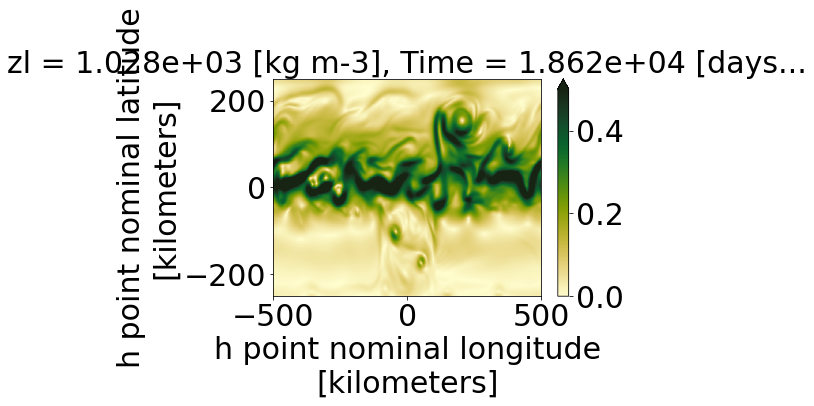

In [93]:
speed_matrix = ((dsx_prog_uh_seltime.isel(Time = t).isel( zl = i))**2 + (dsx_prog_vh_seltime.isel(Time = t).isel(zl = i))**2)**(0.5)
speed_matrix.plot(vmax = 0.5, vmin = 0, cmap=cmocean.cm.speed)

topo
<xarray.DataArray 'e' (yh: 295, xh: 1000)>
dask.array<where, shape=(295, 1000), dtype=float32, chunksize=(295, 1000), chunktype=numpy.ndarray>
Coordinates:
  * yh       (yh) float64 -94.5 -93.5 -92.5 -91.5 ... 196.5 197.5 198.5 199.5
    Time     float64 1.862e+04
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
    zi       float64 1.028e+03
    zl       float64 1.028e+03
Attributes:
    units:          m
    long_name:      Interface Height Relative to Mean Sea Level
    cell_methods:   area:mean zi:point yh:mean xh:mean time: mean
    time_avg_info:  average_T1,average_T2,average_DT
surface
i
<xarray.DataArray 'e' (yh: 295, xh: 1000)>
dask.array<where, shape=(295, 1000), dtype=float32, chunksize=(295, 1000), chunktype=numpy.ndarray>
Coordinates:
  * yh       (yh) float64 -94.5 -93.5 -92.5 -91.5 ... 196.5 197.5 198.5 199.5
    Time     float64 1.862e+04
  * xh       (xh) float64 -499.5 -498.5 -497.5 -496.5 ... 497.5 498.5 499.5
    zi       float64 1.0

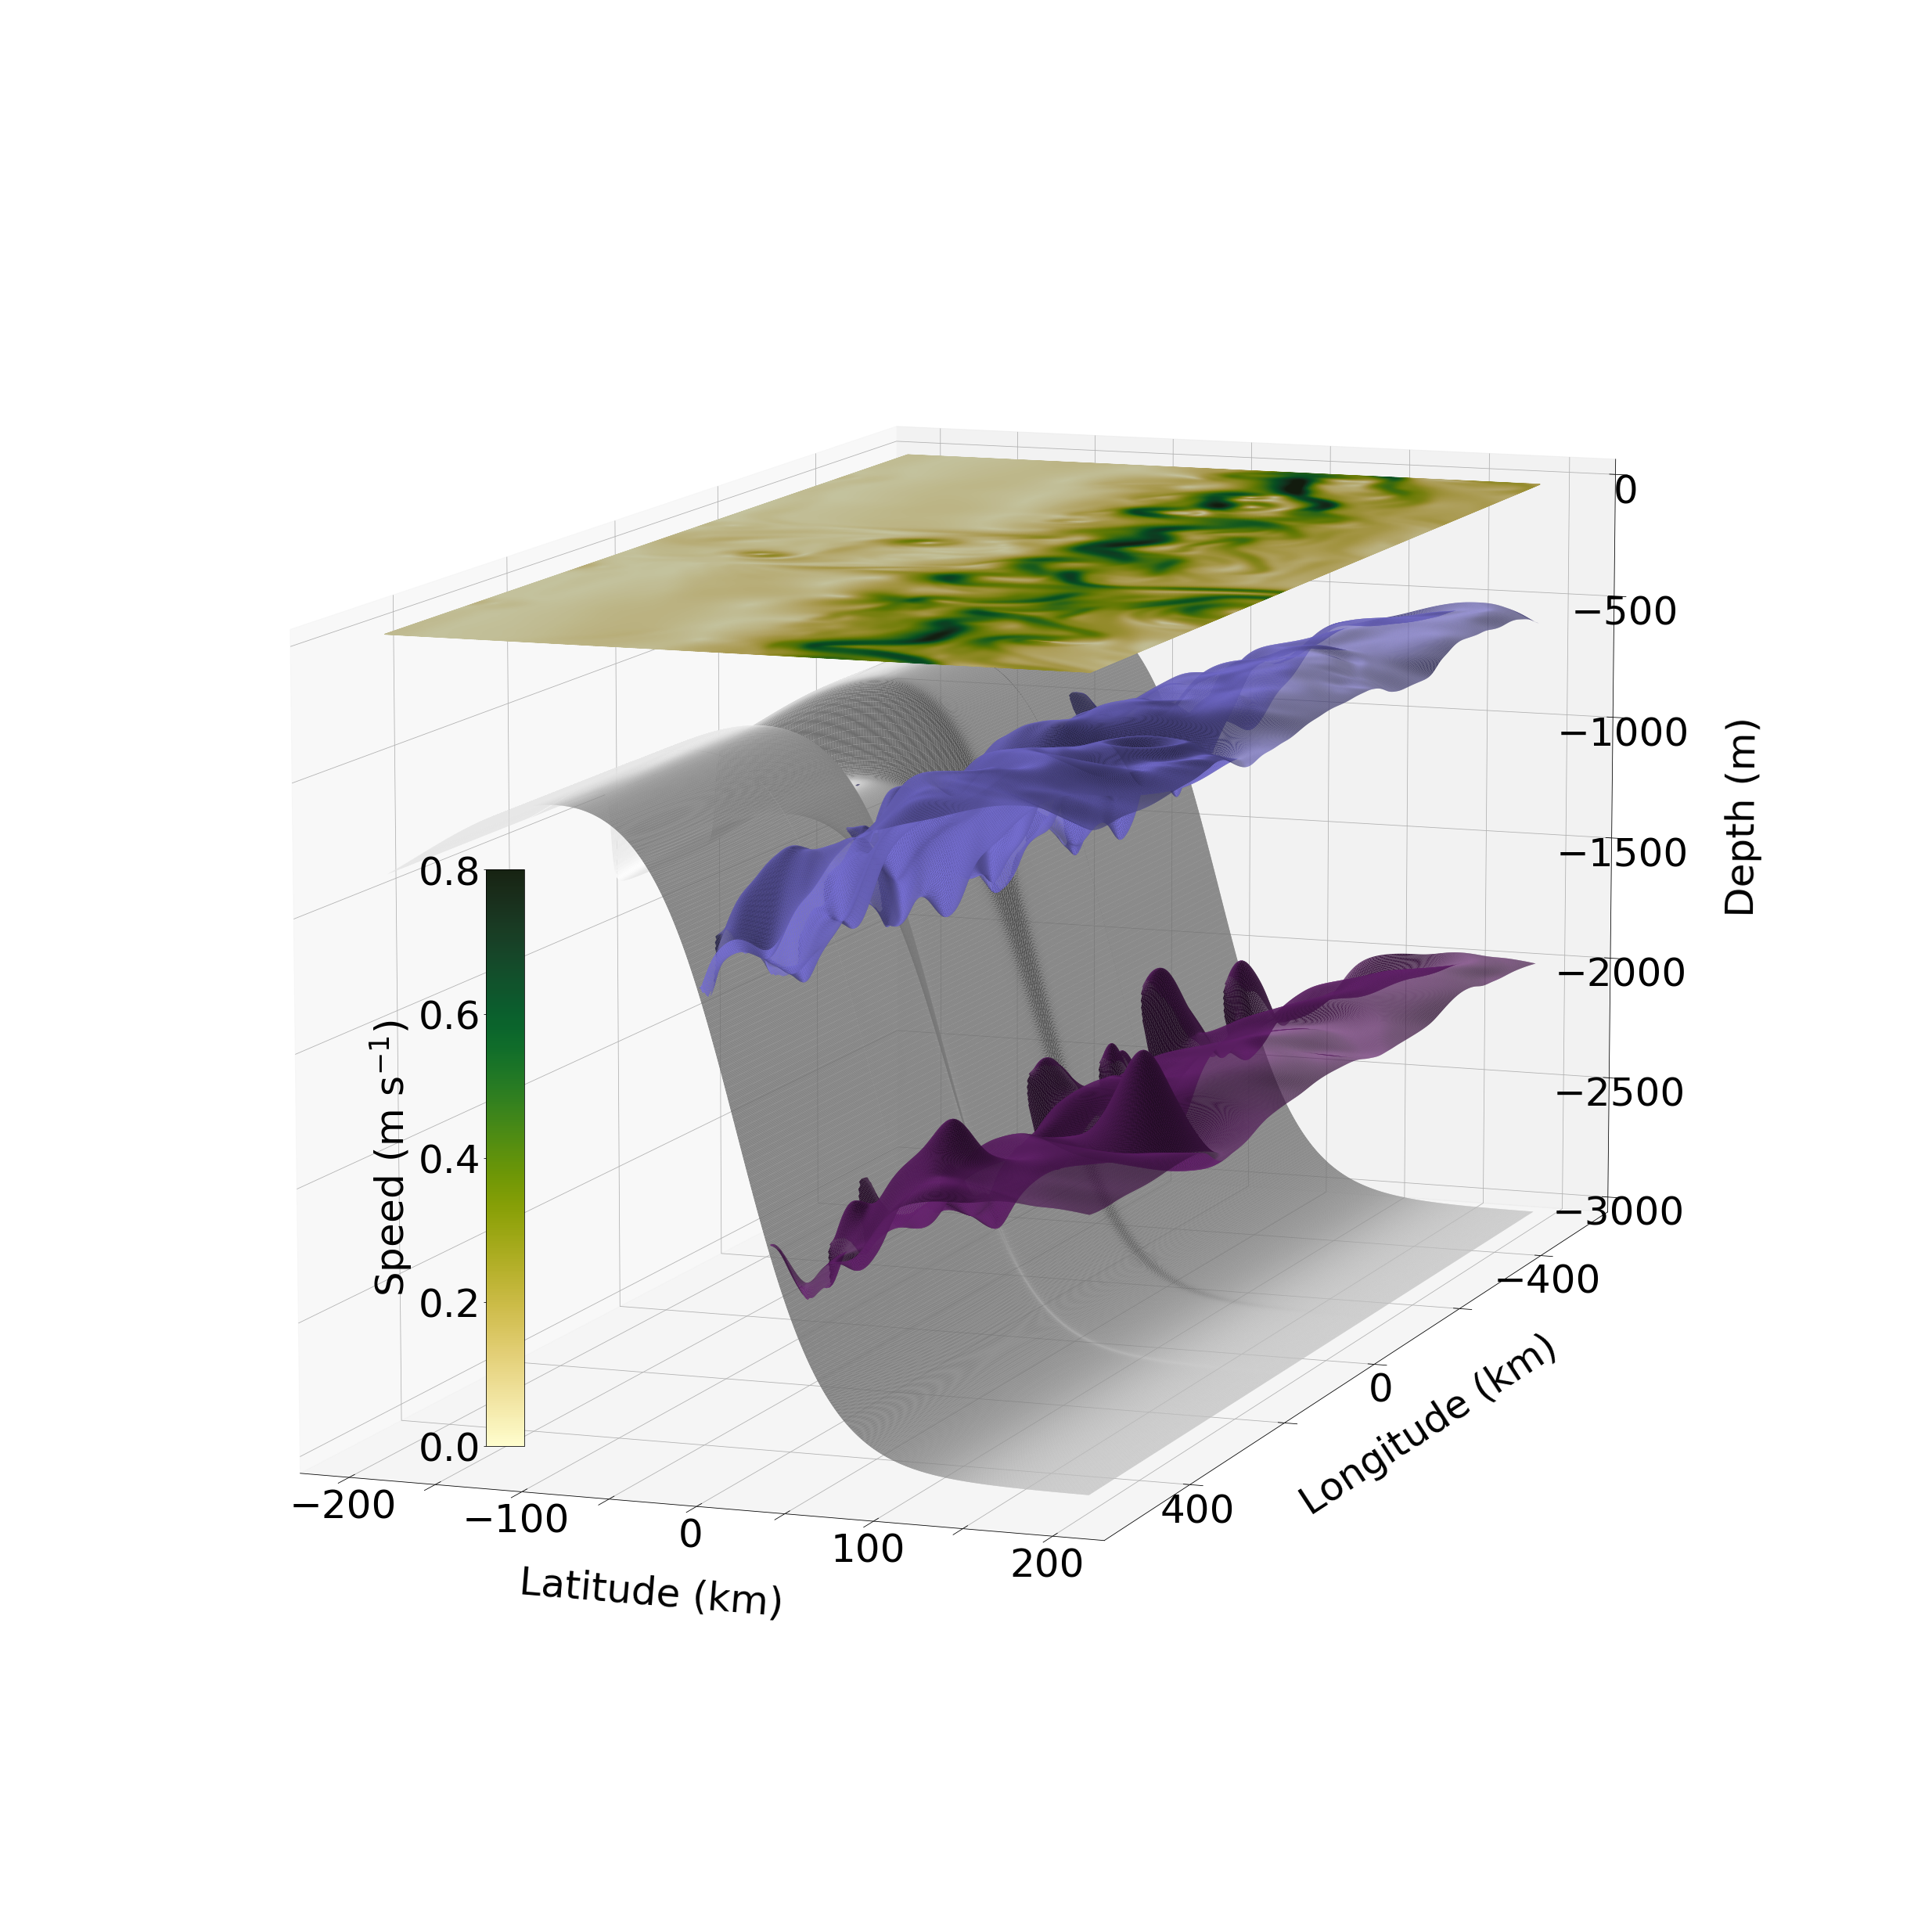

CPU times: user 10min 5s, sys: 3min 34s, total: 13min 40s
Wall time: 10min 24s


In [111]:
%%time
##instanteneous speed?
t = 0
fig = plt.figure( figsize = (35,35)) #35,25 // 25,20

ax = plt.axes(projection = '3d')
ax.set_box_aspect(aspect = (3,6,3)) #1,2,1?? # 2.5,6,3 - narrower shot

cmap = cmocean.tools.crop_by_percent(plt.cm.get_cmap(cmocean.cm.dense), 0.3, which = 'both', N = None)
rgba = cmap([0.2, 0.4, 0.5 ,0.8])
layerdensities =  [1027.8, 1028.0, 1028.1, 1028.3]  
# topography
newcmap = cmocean.tools.crop_by_percent(cmocean.cm.topo, 50, which='max', N=None)

(dsx_prog_mean.e.isel(zi = nlayers).sel(yh = slice(-200,200))).transpose().plot.surface(color =  'w', add_colorbar = False, rstride=1, cstride=1, alpha=1)
print('topo')

for i in [3,2]:
    ##plotting zonal velocity - define colors
    density_surfaces = dsx_prog_snapshot.e.isel(Time = t).isel(zi = i).sel(yh = slice(-95,200)).where(dsx_prog_snapshot.h.isel(Time = t).isel(zl = i).sel(yh = slice(-95,200)) > 20)
    print(density_surfaces)
    density_surfaces.transpose().plot.surface(color =  rgba[i], add_colorbar = False, rstride=1, cstride=1, alpha=1)
    norm=plt.Normalize(vmax = 1028.4, vmin = 1027.6)

    print('surface')
    print('i')

for i in [0]:
    norm_speed=plt.Normalize(vmax = 0.8, vmin = 0)

    speed_matrix = ((dsx_prog_uh_seltime.isel(Time = t).isel( zl = i))**2 + (dsx_prog_vh_seltime.isel(Time = t).isel(zl = i))**2)**(0.5)
    speed_colors = mpl.cm.ScalarMappable( norm = norm_speed, cmap=cmocean.cm.speed).to_rgba(speed_matrix.transpose())
    kwargs = {'facecolors' : speed_colors}
    print('colors')
    ##plotting zonal velocity - define surface
    (dsx_prog_snapshot.e.isel(Time = t).isel(zi = i).sel(yh = slice(-200,200))).transpose().plot.surface(**kwargs, rstride=1, cstride=1, alpha=1) # +1000
    print('surface speed plotted')

cax = ax.inset_axes([0.25, 0.25, 0.02, 0.3])
cbar = plt.colorbar( mpl.cm.ScalarMappable( norm = norm_speed, cmap=cmocean.cm.speed),  ax = ax, cax = cax)#fraction=0.1, pad=0.075,
cbar.ax.yaxis.set_ticks_position('left')
cbar.ax.yaxis.set_label_position('left')

#cbar = plt.colorbar( mpl.cm.ScalarMappable( norm = norm_speed, cmap=cmocean.cm.speed),   shrink = 0.6, pad = 0.04, fraction = 0.1,  location='left')#fraction=0.1, pad=0.075,
cbar.ax.tick_params(labelsize = 50)
cbar.set_label(label = 'Speed (m s$^{-1}$)', size = 50)  
print('colorbar')
    
ax.set_zlabel('Depth (m)',labelpad=125, fontsize = 50)
ax.set_xlabel('Latitude (km)',labelpad=70, fontsize = 50)
ax.set_ylabel('Longitude (km)',labelpad=70, fontsize = 50) #20 for everything except steep 1e0p+02
print('ax_set')
ax.view_init(10,290)##( top-down, leftright) *20,-330 #-30, -300 (10,-280)steep
#ax.view_init(10,-375)
ax.set_zlim([-3000,0]) #-400
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.title('')
ylim = ax.get_ylim()
ax.set_yticks( ax.get_yticks())
ax.set_ylim(ylim[::-1])
print('set lim')
ax.tick_params( axis = 'z', which= 'major', labelsize=50)
ax.tick_params( axis = 'x', which= 'major', labelsize=50)
ax.tick_params( axis = 'y', which= 'major', labelsize=50)

plt.savefig('/g/data/v45/qo9901/layeredASFpaper_fig/3d_topo_density.png', dpi = 600)
plt.tight_layout()
plt.show()